In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
torch.manual_seed(0)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
#reading data
df = pd.read_csv("/content/AAPL.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-27,1.288571,1.302143,1.277679,1.297143,1.112125,496227200
2005-01-28,1.296786,1.321071,1.293571,1.321071,1.132640,801612000
2005-01-31,1.331786,1.390893,1.330536,1.373214,1.177346,1681097600
2005-02-01,1.375893,1.388750,1.367500,1.384464,1.186991,678395200
2005-02-02,1.391964,1.426964,1.387321,1.421964,1.219142,1020062400


In [38]:
print("Dataframe Shape: ", df.shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (4280, 6)
Null Value Present:  False


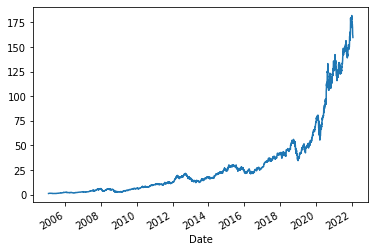

In [39]:
#Plot the True Adj Close Value
df['Adj Close'].plot()

In [40]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-27,1.288571,1.302143,1.277679,1.297143,1.112125,496227200
2005-01-28,1.296786,1.321071,1.293571,1.321071,1.132640,801612000
2005-01-31,1.331786,1.390893,1.330536,1.373214,1.177346,1681097600
2005-02-01,1.375893,1.388750,1.367500,1.384464,1.186991,678395200
2005-02-02,1.391964,1.426964,1.387321,1.421964,1.219142,1020062400
...,...,...,...,...,...,...
2022-01-20,166.979996,169.679993,164.179993,164.509995,164.509995,91420500
2022-01-21,164.419998,166.330002,162.300003,162.410004,162.410004,122501300
2022-01-24,160.020004,162.300003,154.699997,161.619995,161.619995,162706700


In [41]:
#feature_engineering without function with 12 features
df_new=df[['Open', 'High', 'Low', 'Volume']].shift(periods=1)
df_new[['O1', 'H1', 'L1', 'V1']]=df_new[['Open', 'High', 'Low', 'Volume']]
df_new[['O2', 'H2', 'L2', 'V2']]=df_new[['Open', 'High', 'Low', 'Volume']].shift(periods=1)
df_new[['O3', 'H3', 'L3', 'V3']]=df_new[['Open', 'High', 'Low', 'Volume']].shift(periods=2)
df_new=df_new[['O1', 'H1', 'L1', 'V1','O2', 'H2', 'L2', 'V2','O3', 'H3', 'L3', 'V3']]
#Selecting the Features
features=['O1', 'H1', 'L1', 'V1','O2', 'H2', 'L2', 'V2','O3', 'H3', 'L3', 'V3']
df_new=df_new.dropna()
df_new

,O1,H1,L1,V1,O2,H2,L2,V2,O3,H3,L3,V3
Date,,,,,,,,,,,,
2005-02-01,1.331786,1.390893,1.330536,1.681098e+09,1.296786,1.321071,1.293571,8.016120e+08,1.288571,1.302143,1.277679,4.962272e+08
2005-02-02,1.375893,1.388750,1.367500,6.783952e+08,1.331786,1.390893,1.330536,1.681098e+09,1.296786,1.321071,1.293571,8.016120e+08
2005-02-03,1.391964,1.426964,1.387321,1.020062e+09,1.375893,1.388750,1.367500,6.783952e+08,1.331786,1.390893,1.330536,1.681098e+09
2005-02-04,1.412500,1.418393,1.380893,7.316512e+08,1.391964,1.426964,1.387321,1.020062e+09,1.375893,1.388750,1.367500,6.783952e+08
2005-02-07,1.390536,1.409464,1.384464,5.635560e+08,1.412500,1.418393,1.380893,7.316512e+08,1.391964,1.426964,1.387321,1.020062e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-20,170.000000,171.080002,165.940002,9.481500e+07,171.509995,172.539993,169.410004,9.095670e+07,171.339996,173.779999,171.089996,8.035500e+07
2022-01-21,166.979996,169.679993,164.179993,9.142050e+07,170.000000,171.080002,165.940002,9.481500e+07,171.509995,172.539993,169.410004,9.095670e+07
2022-01-24,164.419998,166.330002,162.300003,1.225013e+08,166.979996,169.679993,164.179993,9.142050e+07,170.000000,171.080002,165.940002,9.481500e+07


In [42]:
#feature_engineering with function with 25 features
def generate_time_lags(df, n_lags):
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"O{n}"] = df_n["Open"].shift(n)
        df_n[f"H{n}"] = df_n["High"].shift(n)
        df_n[f"L{n}"] = df_n["Low"].shift(n)
        df_n[f"V{n}"] = df_n["Volume"].shift(n)
        df_n[f"C{n}"] = df_n["Close"].shift(n)
    #df_n = df_n.iloc[n_lags:]
    df_n = df_n.dropna()
    y = pd.DataFrame(df_n['Adj Close'])
    df_n = df_n.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close', 'Adj Close'])
    return df_n, y

In [43]:
n_lags=5
df_generated, y = generate_time_lags(df, n_lags)
df_generated

,O1,H1,L1,V1,C1,O2,H2,L2,V2,C2,...,O4,H4,L4,V4,C4,O5,H5,L5,V5,C5
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-03,1.391964,1.426964,1.387321,1.020062e+09,1.421964,1.375893,1.388750,1.367500,6.783952e+08,1.384464,...,1.296786,1.321071,1.293571,8.016120e+08,1.321071,1.288571,1.302143,1.277679,4.962272e+08,1.297143
2005-02-04,1.412500,1.418393,1.380893,7.316512e+08,1.389464,1.391964,1.426964,1.387321,1.020062e+09,1.421964,...,1.331786,1.390893,1.330536,1.681098e+09,1.373214,1.296786,1.321071,1.293571,8.016120e+08,1.321071
2005-02-07,1.390536,1.409464,1.384464,5.635560e+08,1.407857,1.412500,1.418393,1.380893,7.316512e+08,1.389464,...,1.375893,1.388750,1.367500,6.783952e+08,1.384464,1.331786,1.390893,1.330536,1.681098e+09,1.373214
2005-02-08,1.409464,1.416964,1.383929,5.244568e+08,1.409643,1.390536,1.409464,1.384464,5.635560e+08,1.407857,...,1.391964,1.426964,1.387321,1.020062e+09,1.421964,1.375893,1.388750,1.367500,6.783952e+08,1.384464
2005-02-09,1.411964,1.453214,1.406964,8.900192e+08,1.444643,1.409464,1.416964,1.383929,5.244568e+08,1.409643,...,1.412500,1.418393,1.380893,7.316512e+08,1.389464,1.391964,1.426964,1.387321,1.020062e+09,1.421964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-20,170.000000,171.080002,165.940002,9.481500e+07,166.229996,171.509995,172.539993,169.410004,9.095670e+07,169.800003,...,175.779999,176.619995,171.789993,8.450580e+07,172.190002,176.119995,177.179993,174.820007,7.480520e+07,175.529999
2022-01-21,166.979996,169.679993,164.179993,9.142050e+07,164.509995,170.000000,171.080002,165.940002,9.481500e+07,166.229996,...,171.339996,173.779999,171.089996,8.035500e+07,173.070007,175.779999,176.619995,171.789993,8.450580e+07,172.190002
2022-01-24,164.419998,166.330002,162.300003,1.225013e+08,162.410004,166.979996,169.679993,164.179993,9.142050e+07,164.509995,...,171.509995,172.539993,169.410004,9.095670e+07,169.800003,171.339996,173.779999,171.089996,8.035500e+07,173.070007


In [44]:
#Set Target Variable
#y = pd.DataFrame(df['Adj Close'].shift(periods=3))
y

,Adj Close
Date,
2005-02-03,1.191278
2005-02-04,1.207047
2005-02-07,1.208579
2005-02-08,1.238587
2005-02-09,1.205516
...,...
2022-01-20,164.509995
2022-01-21,162.410004
2022-01-24,161.619995


In [45]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_generated, y, test_size=0.2, shuffle=False)

In [46]:
#data preprocessing
#Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

y_train_s = scaler.fit_transform(y_train)
y_test_s = scaler.transform(y_test)

In [47]:
#regression model
reg = LinearRegression().fit(X_train_s, y_train_s)
reg.score(X_test_s, y_test_s)

0.9846190639934076

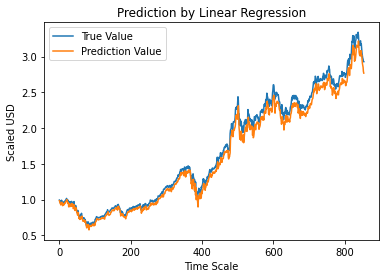

In [48]:
#plot regression prediction
y_predict=reg.predict(X_test_s)
#True vs Predicted Adj Close Value
plt.plot(y_test_s, label='True Value')
plt.plot(y_predict, label='Prediction Value')
plt.title("Prediction by Linear Regression")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

LR: 0.572875 (0.915269)
NN: 0.658457 (0.670128)
KNN: 0.116855 (1.372971)
RF: 0.524585 (0.968817)
SVR: -16.483049 (32.232691)


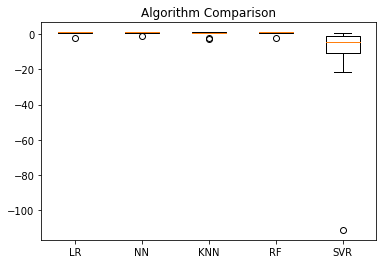

In [49]:
#Comparing different machine learning Algorithms
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor(n_neighbors=10))) 
models.append(('RF', RandomForestRegressor(max_depth=10, n_estimators = 50))) # Ensemble method
models.append(('SVR', SVR(kernel='linear', gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits=10)
    
 cv_results = sklearn.model_selection.cross_val_score(model, X_train_s, y_train_s.ravel(), cv=10, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [50]:
#finding best parameters for SVR
from sklearn.model_selection import GridSearchCV
model = SVR()
param_search = {'kernel':('linear', 'rbf', 'poly'), 'gamma':('scale', 'auto')}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
gsearch.fit(X_train_s, y_train_s.ravel())
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
print('best score:', best_score)
print('best model:', best_model)

best score: -3.255020513456639
best model: SVR(kernel='linear')


In [51]:
#finding best parameters for RF
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 10, 20]
}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
gsearch.fit(X_train_s, y_train_s.ravel())
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
#result of Gridsearch for random forest
print('best score:', best_score)
print('best model:', best_model)

best score: -0.06757686859426836
best model: RandomForestRegressor(max_depth=20, n_estimators=20)


In [52]:
class RNNModel(torch.nn.Module):
    def __init__(self, input_size=1, hidden_size=8, num_layer=1, output_dim=1, dropout_prob=0.1):
        super(RNNModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_size = hidden_size
        self.num_layer = num_layer

        # RNN layers
        self.rnn = torch.nn.RNN(input_size, hidden_size, num_layer, batch_first=True, dropout=dropout_prob)
        # Fully connected layer
        self.linear = torch.nn.Linear(hidden_size, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.num_layer, x.size(0), self.hidden_size).requires_grad_()

        # Forward propagation by passing in the input and hidden state into the model
        out, h0 = self.rnn(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.linear(out)
        return out

In [53]:
class LSTMModel(torch.nn.Module):
    def __init__(self, input_size=1, hidden_size=8, num_layer=1, output_dim=1, dropout_prob=0.1):
        super(LSTMModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_size = hidden_size
        self.num_layer = num_layer

        # LSTM layers
        self.lstm = torch.nn.LSTM(input_size, hidden_size, num_layer, batch_first=True, dropout=dropout_prob)

        # Fully connected layer
        self.linear = torch.nn.Linear(hidden_size, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.num_layer, x.size(0), self.hidden_size).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.num_layer, x.size(0), self.hidden_size).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        # Forward propagation by passing in the input, hidden state, and cell state into the model
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.linear(out)

        return out

In [54]:
class GRUModel(torch.nn.Module):
    def __init__(self, input_size=1, hidden_size=8, num_layer=1, output_dim=1, dropout_prob=0.1):
        super(GRUModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.num_layer = num_layer
        self.hidden_size = hidden_size

        # GRU layers
        self.gru = torch.nn.GRU(input_size, hidden_size, num_layer, batch_first=True, dropout=dropout_prob)

        # Fully connected layer
        self.linear = torch.nn.Linear(hidden_size, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.num_layer, x.size(0), self.hidden_size).requires_grad_()

        # Forward propagation by passing in the input and hidden state into the model
        out, _ = self.gru(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.linear(out)

        return out

In [55]:
#converting dataset to tensor
X_train_t=torch.FloatTensor(X_train_s)
X_train_t=torch.unsqueeze(X_train_t,dim=2)
X_test_t=torch.FloatTensor(X_test_s)
X_test_t=torch.unsqueeze(X_test_t,dim=2)
y_train_t=torch.FloatTensor(y_train_s)
y_test_t=torch.FloatTensor(y_test_s)

In [56]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

In [57]:
#training loop
def training_loop(X, y, model, loss, optimizer, num_epoch=100, batch_size=128):

  
  N = X.shape[0]

  # Training Loop
  for epoch in range(num_epoch):
    for i in range(0, N, batch_size):

      # Minibatch selection (on X and y)
      Xi = X[i:i+batch_size]
      Yi = y[i:i+batch_size]
      
      # Run the RNN
      Xi = Xi.to(device)
      Yi = Yi.to(device)
      predictions = model(Xi)

      # Compute the loss
      l = loss(predictions,Yi)

      # Update the parameters
      optimizer.zero_grad()
      l.backward()
      optimizer.step()

    # Print loss
    if (epoch + 1) % 10 == 0:
        print("Epoch %03d: Train_loss: %.4f " %(epoch+1, l.item()))

In [58]:
# Hyperparameters for RNN
num_epoch = 100
batch_size = 128
lr = 0.001
hidden_size = 32
num_layers= 2
num_epoch = 100
dropout=0

# Initialization
rnn = RNNModel(input_size=1, hidden_size=hidden_size, num_layer = num_layers, output_dim=1,  dropout_prob=dropout)
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=lr)
# Run the training loop
training_loop(X_train_t, y_train_t, rnn, loss, optimizer, num_epoch, batch_size)

Epoch 010: Train_loss: 0.0203 
Epoch 020: Train_loss: 0.0096 
Epoch 030: Train_loss: 0.0024 
Epoch 040: Train_loss: 0.0014 
Epoch 050: Train_loss: 0.0013 
Epoch 060: Train_loss: 0.0011 
Epoch 070: Train_loss: 0.0010 
Epoch 080: Train_loss: 0.0067 
Epoch 090: Train_loss: 0.0018 
Epoch 100: Train_loss: 0.0023 


In [59]:
# Hyperparameters for GRU
num_epoch = 100
batch_size = 128
lr = 0.001
hidden_size = 32
num_layers= 2
dropout = 0.1
num_epoch = 100

# Initialization
gru = GRUModel(input_size=1, hidden_size=hidden_size, num_layer= num_layers, output_dim=1,  dropout_prob=dropout)
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(gru.parameters(), lr=lr)
# Run the training loop
training_loop(X_train_t, y_train_t, gru, loss, optimizer, num_epoch, batch_size)

Epoch 010: Train_loss: 0.0054 
Epoch 020: Train_loss: 0.0093 
Epoch 030: Train_loss: 0.0045 
Epoch 040: Train_loss: 0.0046 
Epoch 050: Train_loss: 0.0035 
Epoch 060: Train_loss: 0.0031 
Epoch 070: Train_loss: 0.0035 
Epoch 080: Train_loss: 0.0028 
Epoch 090: Train_loss: 0.0020 
Epoch 100: Train_loss: 0.0027 


In [60]:
#hyperparameters for LSTM
hidden_size = 32
num_layers = 2
batch_size = 128
dropout = 0.1
num_epoch = 100
lr = 0.001
# Initialization
lstm = LSTMModel(input_size=1, hidden_size=hidden_size, num_layer= num_layers, output_dim=1,  dropout_prob=dropout)
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=lr)
# Run the training loop
training_loop(X_train_t, y_train_t, lstm, loss, optimizer, num_epoch, batch_size)

Epoch 010: Train_loss: 0.0186 
Epoch 020: Train_loss: 0.0039 
Epoch 030: Train_loss: 0.0021 
Epoch 040: Train_loss: 0.0018 
Epoch 050: Train_loss: 0.0010 
Epoch 060: Train_loss: 0.0015 
Epoch 070: Train_loss: 0.0009 
Epoch 080: Train_loss: 0.0029 
Epoch 090: Train_loss: 0.0023 
Epoch 100: Train_loss: 0.0021 


In [61]:
#RNN test evaluation
rnn.eval()
predictions = rnn(X_test_t)
loss_test = loss(y_test_t,predictions)
print("Test_loss for RNN: %.4f " %(loss_test.item()))

Test_loss for RNN: 0.6850 


In [62]:
#GRU test evaluation
gru.eval()
predictions = gru(X_test_t)
loss_test = loss(y_test_t,predictions)
print("Test_loss for GRU: %.4f " %(loss_test.item()))

Test_loss for GRU: 0.7927 


In [63]:
#LSTM test evaluation
lstm.eval()
predictions = lstm(X_test_t)
loss_test = loss(y_test_t, predictions)
print("Test_loss for LSTM: %.4f " %(loss_test.item()))

Test_loss for LSTM: 0.7766 
